# COMP 6934 - Assignment 1
Name: Mohammad Shehabul Islam

ID: 202196528

## Question 1

In [1]:
# Imports
import pandas as pd 

In [2]:
df_plastic_prod = pd.read_csv('plastic-production.csv') # reads the 'Plastic Production' dataset

In [3]:
df1 = df_plastic_prod.copy()

In [4]:
df1 = df1.rename(columns={'Time': 'Year', 'Applications': 'Sectors', 'Value': 'Sum of Plastic Produced'})

In [5]:
df_plastic_prod.head(3)

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440


In [6]:
df_haha = df_plastic_prod.copy()
df_haha_total = df_haha[df_haha['Applications'] == 'Total']

In [7]:
df_haha = df_haha.drop(df_haha[df_haha['Applications'] == 'Total'].index)
len(df_haha)

390

In [8]:
df_haha.head(3)

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440


In [9]:
df_haha_total.head(3)

,Applications,Time,Value
390,Total,1990,129.887
391,Total,1991,134.870
392,Total,1992,143.569


In [10]:
df_haha_total = df_haha_total.rename(columns={'Time': 'Year', 'Applications': 'Sectors', 'Value': 'given_Total'})
df_haha_total.head(3)

,Sectors,Year,given_Total
390,Total,1990,129.887
391,Total,1991,134.870
392,Total,1992,143.569


In [11]:
df_haha.head(3)

,Applications,Time,Value
0,Other,1990,19.433
1,Other,1991,20.160
2,Other,1992,21.440


In [12]:
df2 = df_haha[['Applications','Time','Value']].groupby(['Time']).sum().reset_index().rename(columns={'Time': 'Year', 'Applications': 'Sectors', 'Value': 'calculated_Sum'}) # summing Plastic Production by Year and Sectors
df2

C:\Users\Siam Islam\AppData\Local\Temp\ipykernel_5440\1589720772.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df_haha[['Applications','Time','Value']].groupby(['Time']).sum().reset_index().rename(columns={'Time': 'Year', 'Applications': 'Sectors', 'Value': 'calculated_Sum'}) # summing Plastic Production by Year and Sectors


,Year,calculated_Sum
0,1990,129.889
1,1991,134.870
2,1992,143.570
3,1993,149.685
4,1994,164.447
5,1995,170.918
6,1996,183.439
7,1997,197.228
8,1998,206.397
9,1999,222.144


In [13]:
df_new = pd.merge(df_haha_total, df2, on='Year')
df_new.head()

,Sectors,Year,given_Total,calculated_Sum
0,Total,1990,129.887,129.889
1,Total,1991,134.870,134.870
2,Total,1992,143.569,143.570
3,Total,1993,149.685,149.685
4,Total,1994,164.447,164.447


In [14]:
df_new.drop(columns=['Sectors'], inplace=True)
df_new.head(3)

,Year,given_Total,calculated_Sum
0,1990,129.887,129.889
1,1991,134.870,134.870
2,1992,143.569,143.570


In [15]:
calc = df_new['given_Total'] - df_new['calculated_Sum']
result = abs(df_new['given_Total'] - df_new['calculated_Sum']) < 3e-3
df_new['Difference'] = calc
df_new['Result'] = result
df_new.head()                                   # True represents that the sum is within the precision of ~3e-3

,Year,given_Total,calculated_Sum,Difference,Result
0,1990,129.887,129.889,-0.002,True
1,1991,134.870,134.870,0.000,True
2,1992,143.569,143.570,-0.001,True
3,1993,149.685,149.685,0.000,True
4,1994,164.447,164.447,0.000,True


In [16]:
df_new[df_new['Result'] == False]

,Year,given_Total,calculated_Sum,Difference,Result
23,2013,393.737,393.734,0.003,False


In [17]:
df_new[df_new['Result'] == True]

,Year,given_Total,calculated_Sum,Difference,Result
0,1990,129.887,129.889,-2.000000e-03,True
1,1991,134.870,134.870,0.000000e+00,True
2,1992,143.569,143.570,-1.000000e-03,True
3,1993,149.685,149.685,0.000000e+00,True
4,1994,164.447,164.447,0.000000e+00,True
5,1995,170.917,170.918,-1.000000e-03,True
6,1996,183.440,183.439,1.000000e-03,True
7,1997,197.228,197.228,0.000000e+00,True
8,1998,206.397,206.397,0.000000e+00,True
9,1999,222.145,222.144,1.000000e-03,True


In [18]:
# df_plastic_prod['Applications'].unique()

In [19]:
# df = df_plastic_prod[['Applications', 'Value','Time']].groupby(['Time','Applications']).sum().reset_index().rename(columns={'Time': 'Year', 'Applications': 'Sectors', 'Value': 'Sum of Plastic Produced'}) # summing Plastic Production by Year and Sectors
# df.head(15)

In [20]:
# df_removed = df.copy()
# df_removed.head()
# df_removed.drop([11,25,39,53,67,81,95,109,123,137,151,165,179,193,207,221,235,249,263,277,291,305,319,333,347,361,375,389,403,417], axis=0, inplace=True)
# df_removed = df_removed[['Year','Sum of Plastic Produced']].groupby('Year').sum().reset_index().rename(columns={'Sum of Plastic Produced': 'calculated_Sum'})

In [21]:
# df_removed.head(3)

In [22]:
# df2 = df.copy()
# df2.head(3)

In [23]:
# df_total = df1.loc[df1['Applications']=='Total'].rename(columns={'Time':'Year','Applications':'Sector','Value':'given_Total'})
# df_total.head(3)

In [24]:
# df_total = pd.merge(df_total, df_removed, on='Year')
# df_total.head(3)

In [25]:
# calc = df_total['given_Total'] - df_total['calculated_Sum']
# result = abs(df_total['given_Total'] - df_total['calculated_Sum']) < 3e-3
# df_total['Difference'] = calc
# df_total['Result'] = result
# df_total.head(5)                      # True represents that the sum is within the precision of ~3e-3

In [26]:
# df[['Year','Sum of Plastic Produced']].groupby('Year').sum()   # total production for all years

In [27]:
# df_total_sum = df[['Year','Sum of Plastic Produced']].groupby('Year').sum()  # sum of total production for all years
# df_total_sum['Sum of Plastic Produced'].sum()

In [28]:
# df['Sum of Plastic Produced'].sum() # calculated sum of plastic produced 

## Question 2

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = df1.copy()
df_new = df[['Sectors','Year','Sum of Plastic Produced']].groupby(['Year','Sectors']).sum().reset_index()
df_new

,Year,Sectors,Sum of Plastic Produced
0,1990,Building & construction,21.872
1,1990,Consumer & institutional Products,13.770
2,1990,Electrical/electronics,5.251
3,1990,Industrial/machinery,0.817
4,1990,Marine coatings,0.163
...,...,...,...
415,2019,Textile sector - clothing,28.759
416,2019,Textile sector - others,15.116
417,2019,Total,459.746
418,2019,Transportation - other,54.431


In [31]:
df2 = df_new[['Sectors', 'Sum of Plastic Produced','Year']].groupby(['Sectors','Year']).sum().reset_index()
df2

,Sectors,Year,Sum of Plastic Produced
0,Building & construction,1990,21.872
1,Building & construction,1991,22.684
2,Building & construction,1992,24.119
3,Building & construction,1993,25.116
4,Building & construction,1994,27.558
...,...,...,...
415,Transportation - tyres,2015,7.100
416,Transportation - tyres,2016,7.164
417,Transportation - tyres,2017,7.300
418,Transportation - tyres,2018,7.522


In [32]:
df2['Sectors'].unique().tolist()

['Building & construction',
 'Consumer & institutional Products',
 'Electrical/electronics',
 'Industrial/machinery',
 'Marine coatings',
 'Other',
 'Packaging',
 'Personal care products',
 'Road marking',
 'Textile sector - clothing',
 'Textile sector - others',
 'Total',
 'Transportation - other',
 'Transportation - tyres']

In [33]:
df_total = df2[(df2.Sectors == 'Total')]
df_building = df2[(df2.Sectors == 'Building & construction')]
df_packaging = df2[(df2.Sectors == 'Packaging')]
df_other = df2[(df2.Sectors == 'Other')]

df_consumer = df2[(df2.Sectors == 'Consumer & institutional Products')]
df_electronics = df2[(df2.Sectors == 'Electrical/electronics')]
df_industry = df2[(df2.Sectors == 'Industrial/machinery')]
df_marine = df2[(df2.Sectors == 'Marine coatings')]
df_personal = df2[(df2.Sectors == 'Personal care products')]
df_road = df2[(df2.Sectors == 'Road marking')]
df_textile_clothing = df2[(df2.Sectors == 'Textile sector - clothing')]
df_textile_other = df2[(df2.Sectors == 'Textile sector - others')]
df_transportation_other = df2[(df2.Sectors == 'Transportation - other')]
df_transportation_tyres = df2[(df2.Sectors == 'Transportation - tyres')]

df_total.head(3)

,Sectors,Year,Sum of Plastic Produced
330,Total,1990,129.887
331,Total,1991,134.870
332,Total,1992,143.569


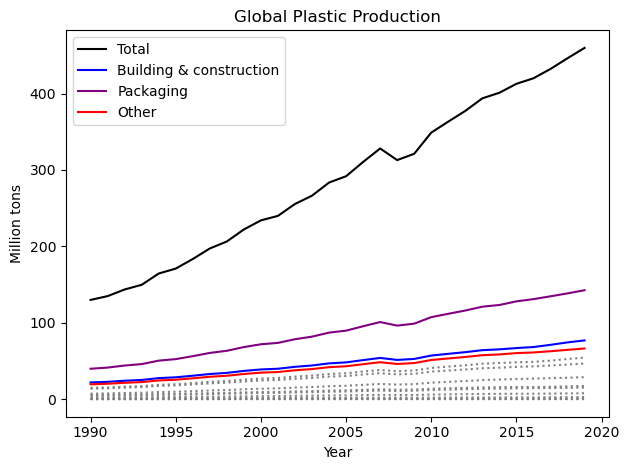

In [34]:
plt.plot(df_total['Year'], df_total['Sum of Plastic Produced'], label='Total', color='black')
plt.plot(df_building['Year'], df_building['Sum of Plastic Produced'], label='Building & construction', color='blue')
plt.plot(df_packaging['Year'], df_packaging['Sum of Plastic Produced'], label='Packaging', color='purple')
plt.plot(df_other['Year'], df_other['Sum of Plastic Produced'], label='Other', color='red')

plt.plot(df_consumer['Year'], df_consumer['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_electronics['Year'], df_electronics['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_industry['Year'], df_industry['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_marine['Year'], df_marine['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_personal['Year'], df_personal['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_road['Year'], df_road['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_textile_clothing['Year'], df_textile_clothing['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_textile_other['Year'], df_textile_other['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_transportation_other['Year'], df_transportation_other['Sum of Plastic Produced'], color='grey', linestyle='dotted')
plt.plot(df_transportation_tyres['Year'], df_transportation_tyres['Sum of Plastic Produced'], color='grey', linestyle='dotted')


plt.xlabel('Year')
plt.ylabel('Million tons')
plt.title('Global Plastic Production')
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Global Plastic Production.pdf')

## Question 3

In [35]:
df_river_plastics = pd.read_csv('river-plastics.csv')
df_river_plastics.head(3)

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,28486,362,1117,69833,1565,2.24
1,Algeria,2316559,998,80,764578,5774,0.76
2,Angola,1247357,1600,1025,236946,860,0.36


In [36]:
df_river_plastics['Ratio Coastal_Length/Area'] = df_river_plastics['Coast length'] / df_river_plastics['Area']
df_river_plastics.head(3)

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW,Ratio Coastal_Length/Area
0,Albania,28486,362,1117,69833,1565,2.24,0.012708
1,Algeria,2316559,998,80,764578,5774,0.76,0.000431
2,Angola,1247357,1600,1025,236946,860,0.36,0.001283


In [37]:
# x_data = df_river_plastics['Ratio Coastal_Length/Area']
# y_data = df_river_plastics['Ratio ME/MPW']
# rainfall_ratio = df_river_plastics['Rainfall']

# plt.xlabel('Ratio of coastal length to area')
# plt.ylabel('Plastic waste in oceans (% of total plastic waste)')
# plt.title('Drivers of Plastic Pollution in the Oceans')

# plt.yscale('log')
# plt.xscale('log')
# plt.scatter(x=x_data, y=y_data, c=rainfall_ratio, cmap="viridis") 

# plt.colorbar(label="Rainfall [mm/year]", orientation="vertical") 
# plt.tight_layout()
# plt.show() 

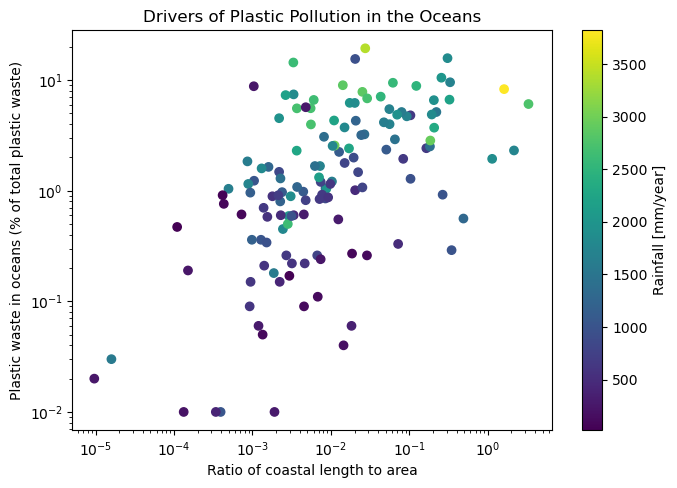

In [38]:
fig = plt.Figure(figsize=(6,4))
ax = fig.add_axes([0, 0, 1, 1])

x_data = df_river_plastics['Ratio Coastal_Length/Area']
y_data = df_river_plastics['Ratio ME/MPW']
rainfall_ratio = df_river_plastics['Rainfall']

val = ax.scatter(x=x_data, y=y_data, c=rainfall_ratio, cmap="viridis")
fig.colorbar(val, label="Rainfall [mm/year]")

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Ratio of coastal length to area')
ax.set_ylabel('Plastic waste in oceans (% of total plastic waste)')
ax.set_title('Drivers of Plastic Pollution in the Oceans')

fig

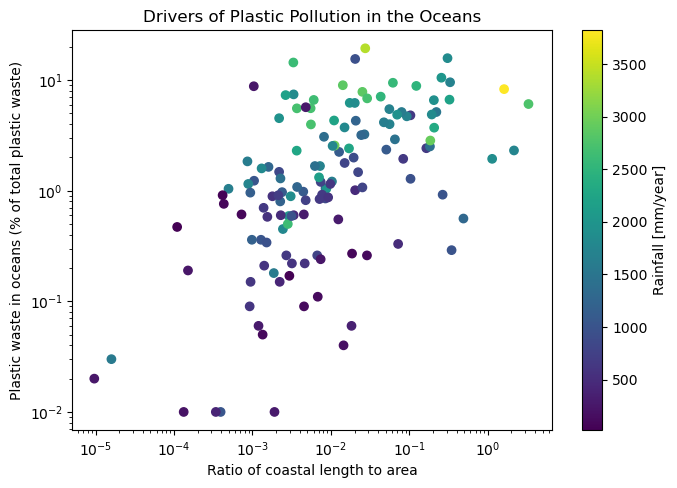

In [40]:
fig

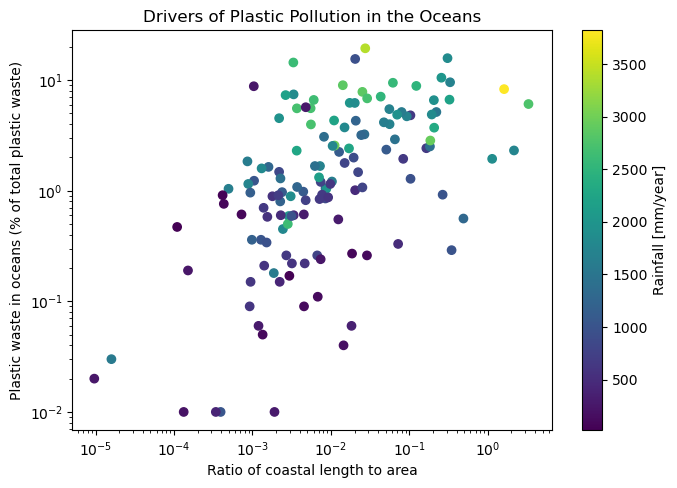

In [41]:
fig